# Rainfall Weather Forecasting

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


# EDA Exploratory Data Analysis

In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

we can see that their are too many null values present in the dataset lets replace the null value with replace function

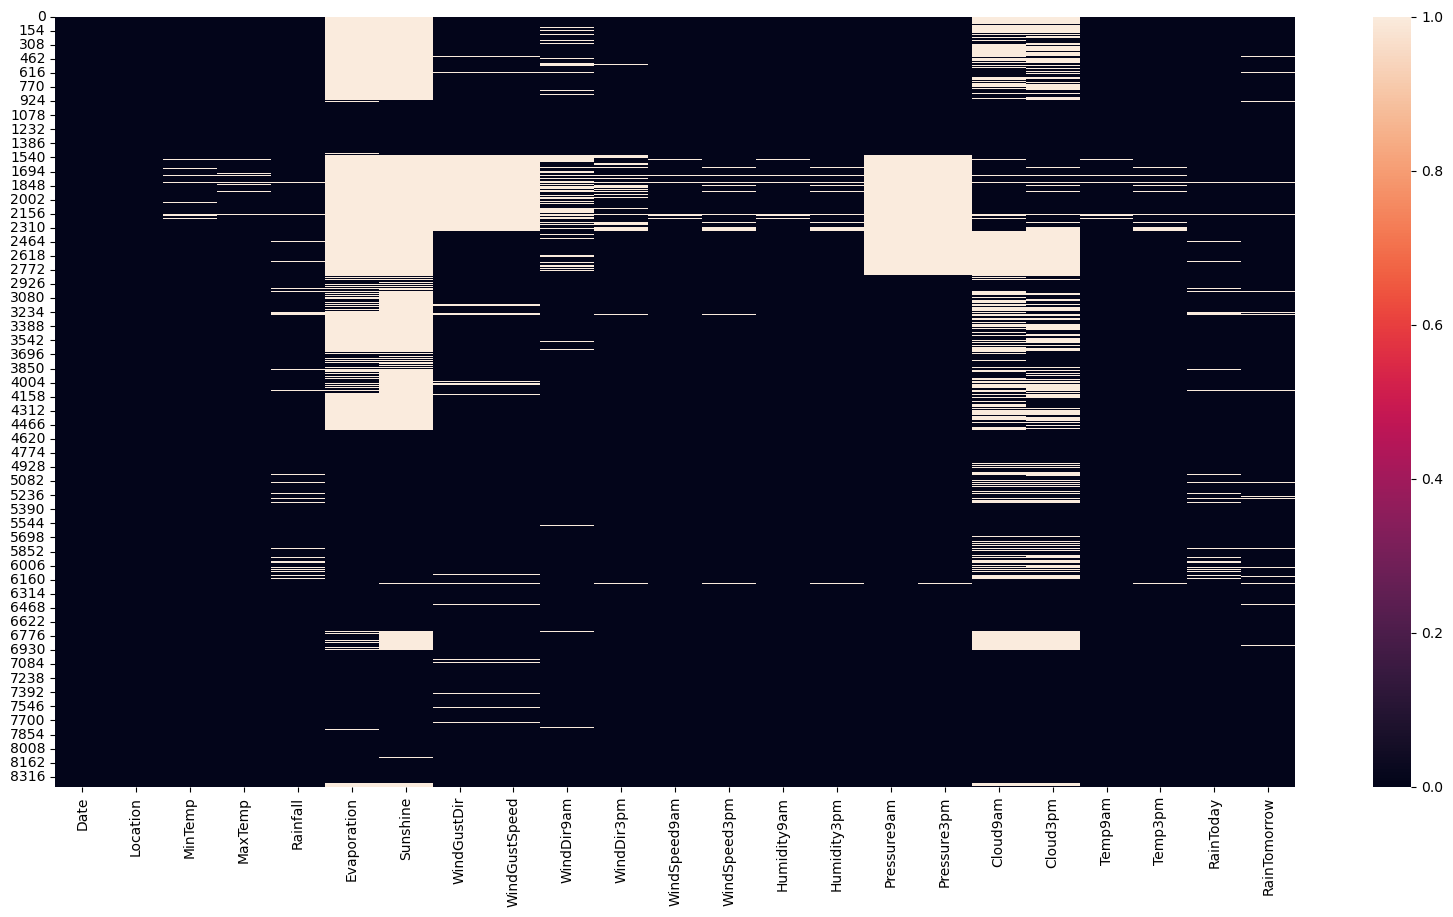

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.replace(np.nan,0, inplace = True)
df.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,0.0,0.0,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,0.0,0.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,0.0,0.0,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,0.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,0.0,0.0,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,0.0,0.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,0.0,0.0,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,0.0,0.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0.0,0.0,W,28.0,S,...,58.0,27.0,1007.0,1005.7,0.0,0.0,20.1,28.2,Yes,No


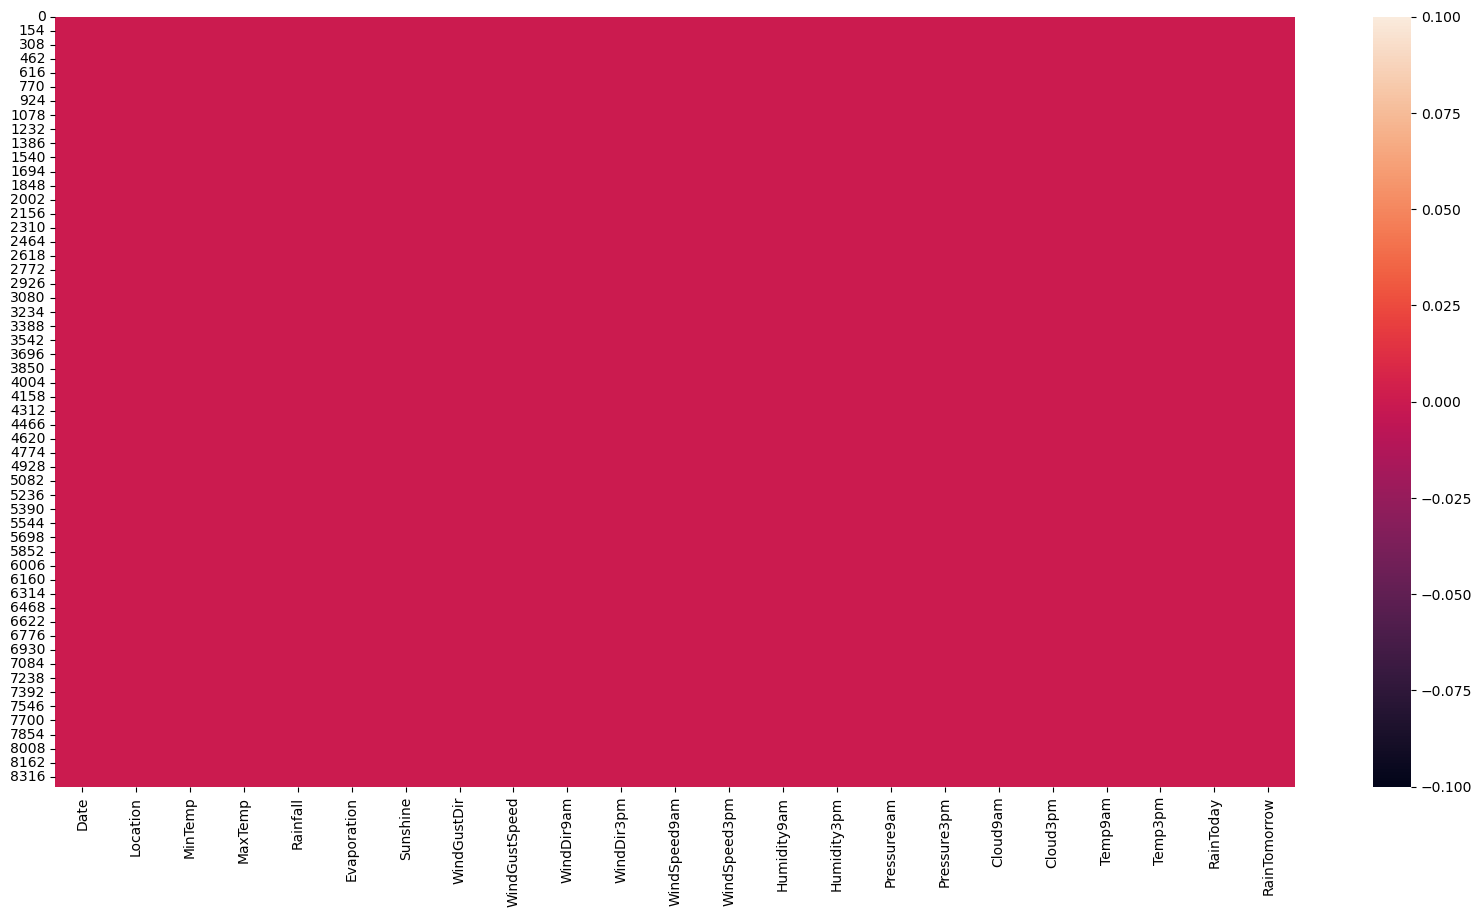

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

now all the null values is filled

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.00000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.075858,23.690053,2.725982,3.142801,4.014042,35.448902,13.72273,18.298279,67.347537,50.629318,859.528534,857.136404,3.254362,3.190979,17.643953,22.187205
std,5.520399,6.435313,10.319872,4.679677,4.744297,18.902830,10.21286,9.924211,17.702144,19.150542,368.723521,368.195229,3.189375,3.078155,5.791059,6.405288
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.100000,19.200000,0.000000,0.000000,0.000000,26.000000,6.00000,11.000000,56.000000,38.000000,1009.300000,1007.000000,0.000000,0.000000,13.700000,17.900000
50%,13.200000,23.200000,0.000000,1.800000,0.200000,35.000000,13.00000,19.000000,68.000000,51.000000,1016.100000,1013.600000,2.000000,2.000000,17.700000,21.800000
75%,17.300000,28.000000,0.800000,5.200000,8.900000,48.000000,20.00000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.00000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<Axes: >

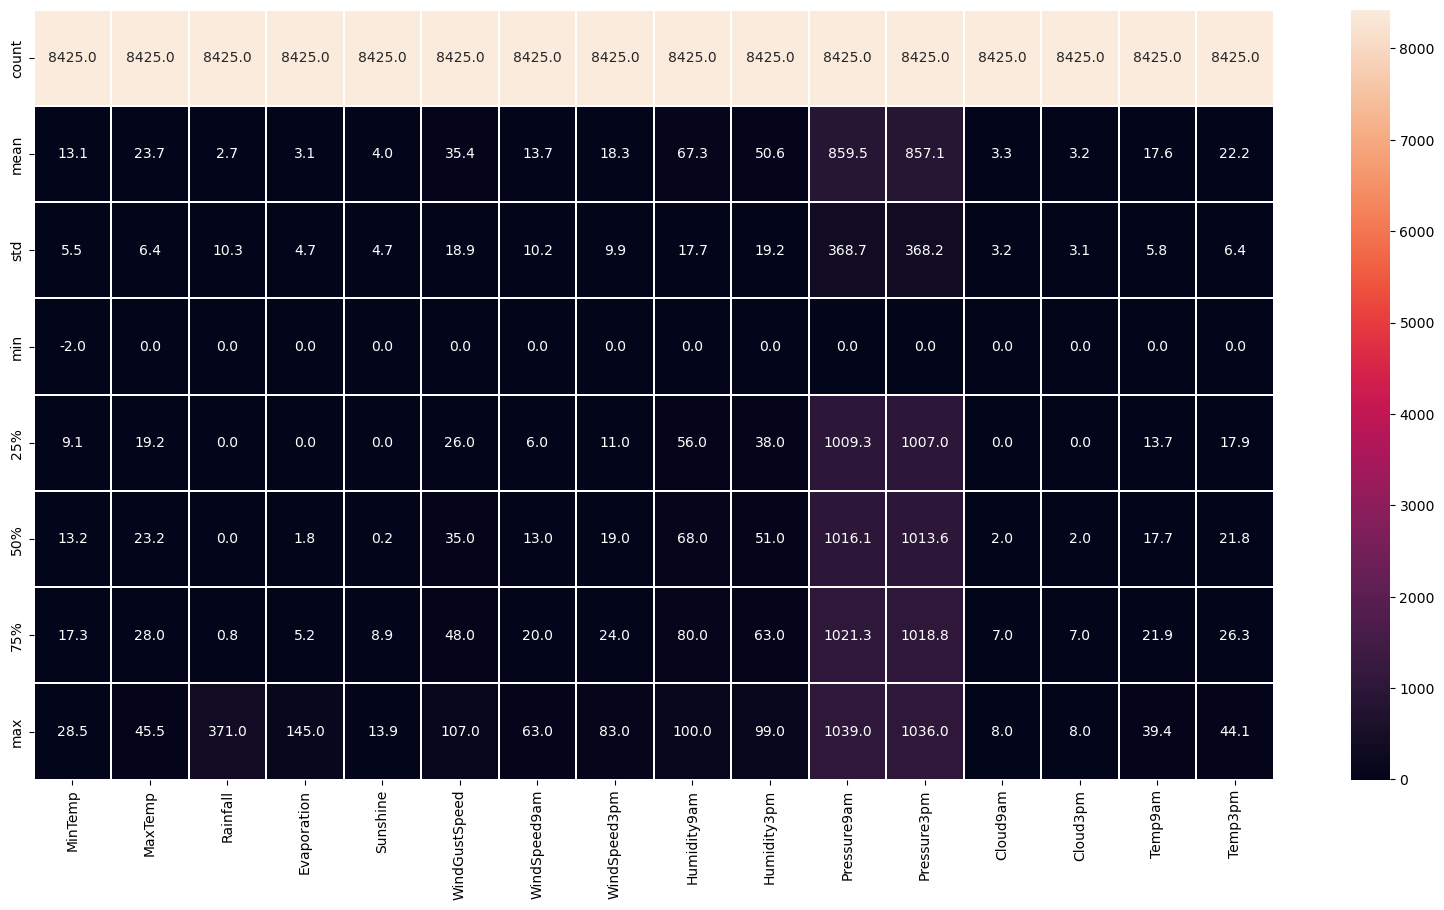

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

# Data Visualization

In [15]:
Categorical = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(Categorical)))
print("Categorical Features: ",Categorical)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
Numerical = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(Numerical)))
print("Numerical Features: ",Numerical)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
WindGustDir
0      991
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
WindDir9am
N      906
0      829
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
WindDir3pm
SE     813
S      7

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date'].dtype

dtype('<M8[ns]')

In [20]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [21]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,...,1007.1,8.0,0.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,...,1007.8,0.0,0.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,...,1008.7,0.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,...,1012.8,0.0,0.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<Axes: >

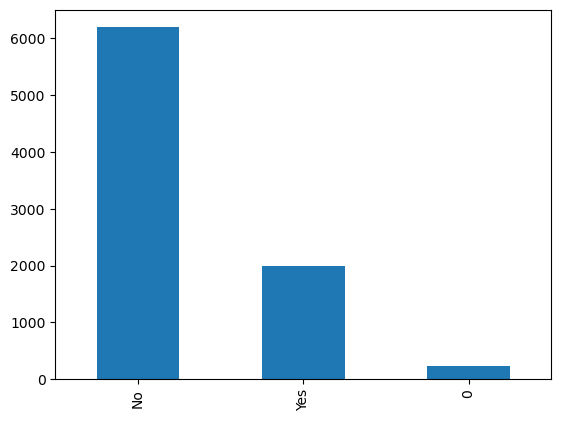

In [22]:
df['RainTomorrow'].value_counts().plot(kind='bar')

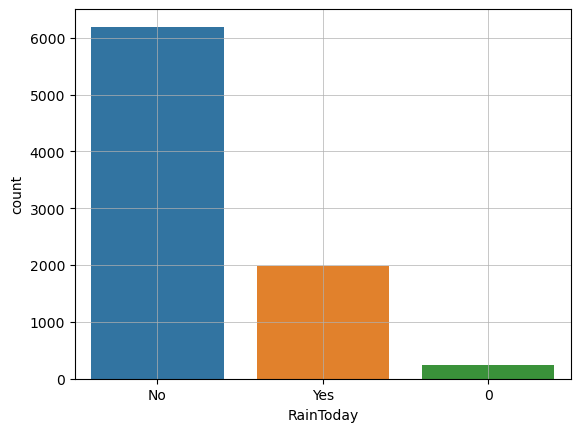

In [23]:
sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

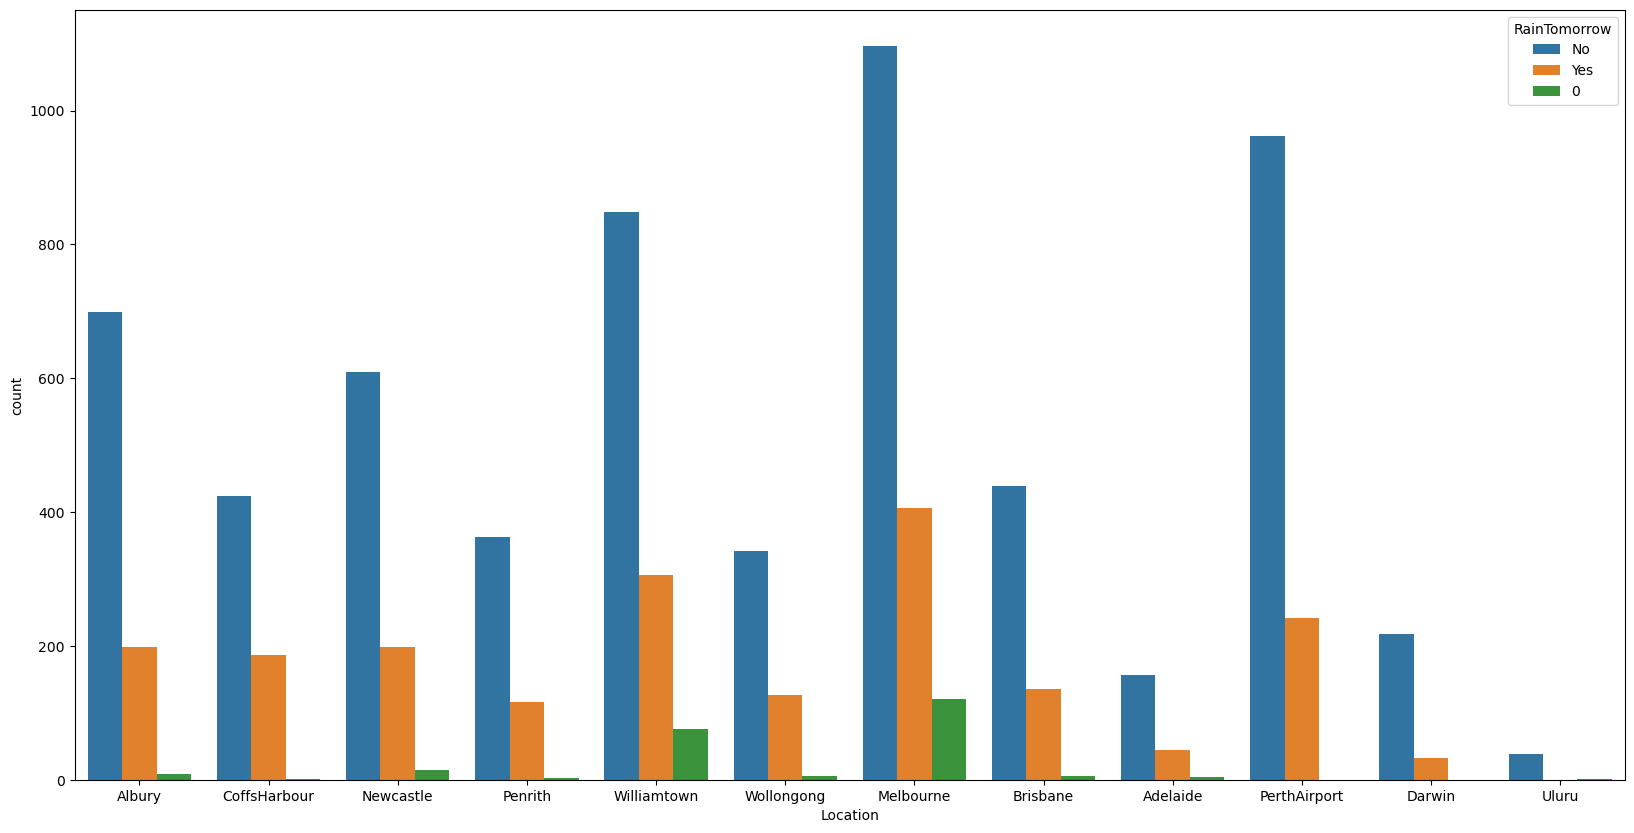

In [24]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

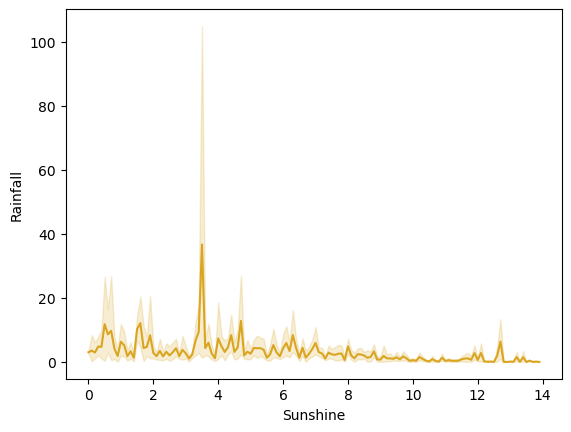

In [25]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

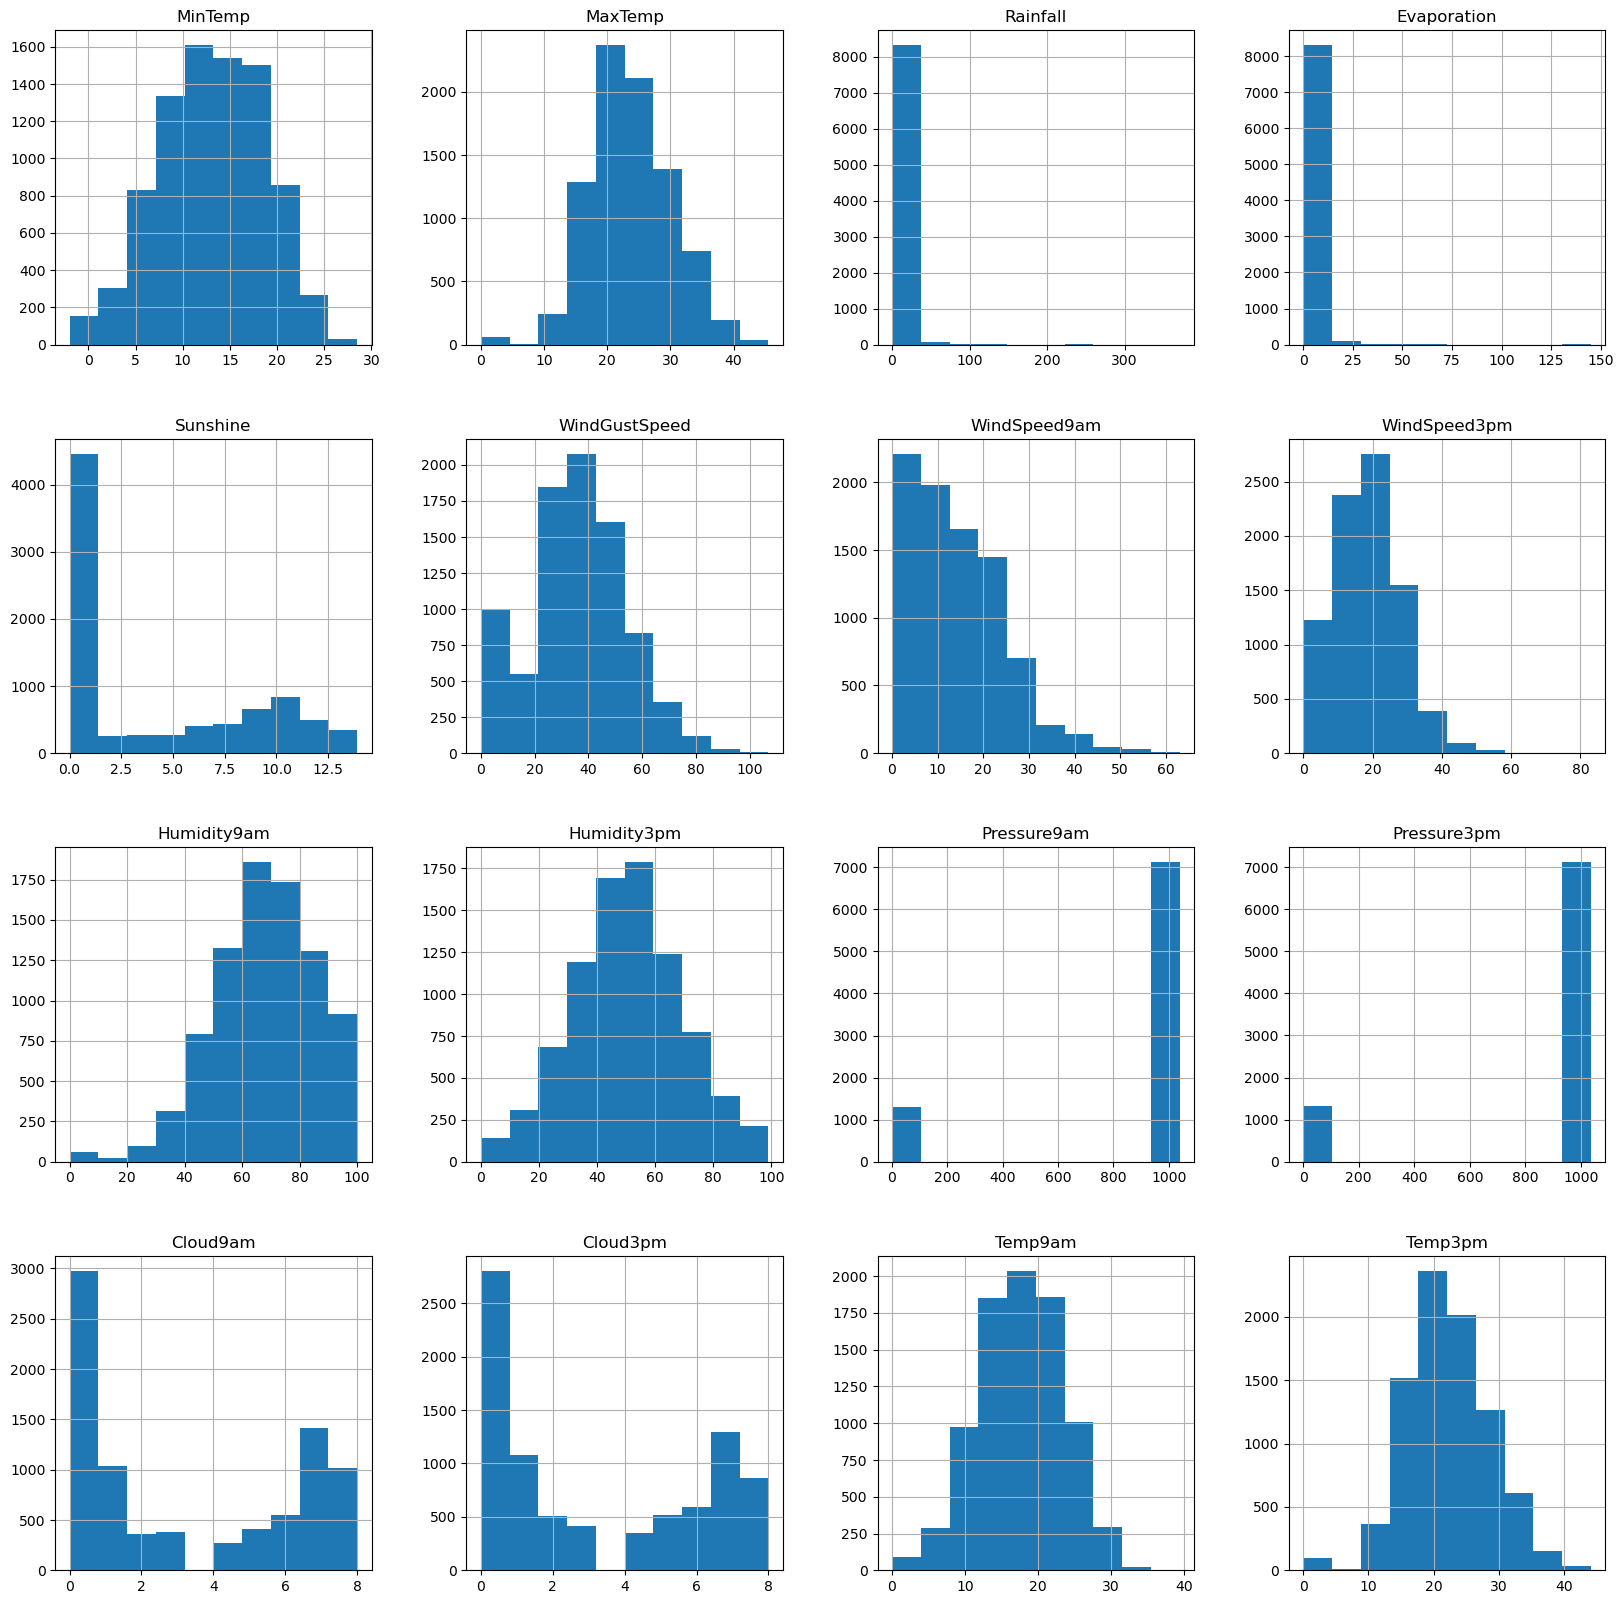

In [26]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[num_features].hist(bins=10,figsize=(20,20))

# Now Checking for the Correlation

In [27]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.687010,0.078379,0.269000,0.148567,0.202161,0.153991,0.196907,-0.066579,0.101987,0.096481,0.096213,0.184237,0.140444,0.883019,0.664805,0.033669,-0.237337,0.008967
MaxTemp,0.687010,1.000000,-0.078789,0.300480,0.292542,0.144550,0.033900,0.110711,-0.324652,-0.353094,0.059923,0.058520,-0.162575,-0.147034,0.825243,0.905600,0.101370,-0.147366,0.017060
Rainfall,0.078379,-0.078789,1.000000,-0.004287,-0.087678,0.042945,0.047036,0.023499,0.218504,0.227973,-0.003696,-0.002492,0.193136,0.162555,-0.005127,-0.079848,0.004491,-0.016258,-0.013029
Evaporation,0.269000,0.300480,-0.004287,1.000000,0.471806,0.251020,0.249515,0.210712,-0.273290,-0.157090,0.284469,0.282718,0.040270,0.028645,0.325826,0.289447,-0.006044,0.049789,0.022204
Sunshine,0.148567,0.292542,-0.087678,0.471806,1.000000,0.234789,0.218448,0.182165,-0.338203,-0.274827,0.361157,0.358763,-0.076584,-0.041103,0.272485,0.295100,-0.265601,0.019281,0.007805
WindGustSpeed,0.202161,0.144550,0.042945,0.251020,0.234789,1.000000,0.604853,0.601940,-0.197811,-0.051263,0.535393,0.535645,0.019174,0.049228,0.177570,0.137475,-0.211107,0.015796,0.008420
WindSpeed9am,0.153991,0.033900,0.047036,0.249515,0.218448,0.604853,1.000000,0.561953,-0.302850,-0.080213,0.354465,0.355095,0.058341,0.118064,0.129203,0.028608,-0.096233,0.038981,-0.002833
WindSpeed3pm,0.196907,0.110711,0.023499,0.210712,0.182165,0.601940,0.561953,1.000000,-0.204091,-0.026847,0.315773,0.316380,0.052093,0.058857,0.200664,0.128934,-0.068797,0.048667,-0.004788
Humidity9am,-0.066579,-0.324652,0.218504,-0.273290,-0.338203,-0.197811,-0.302850,-0.204091,1.000000,0.601454,-0.085425,-0.083341,0.347572,0.220555,-0.269620,-0.292533,0.081808,-0.105097,0.002139
Humidity3pm,0.101987,-0.353094,0.227973,-0.157090,-0.274827,-0.051263,-0.080213,-0.026847,0.601454,1.000000,0.043429,0.049051,0.426030,0.455641,-0.087488,-0.330443,-0.051231,-0.072843,0.020123


<Axes: >

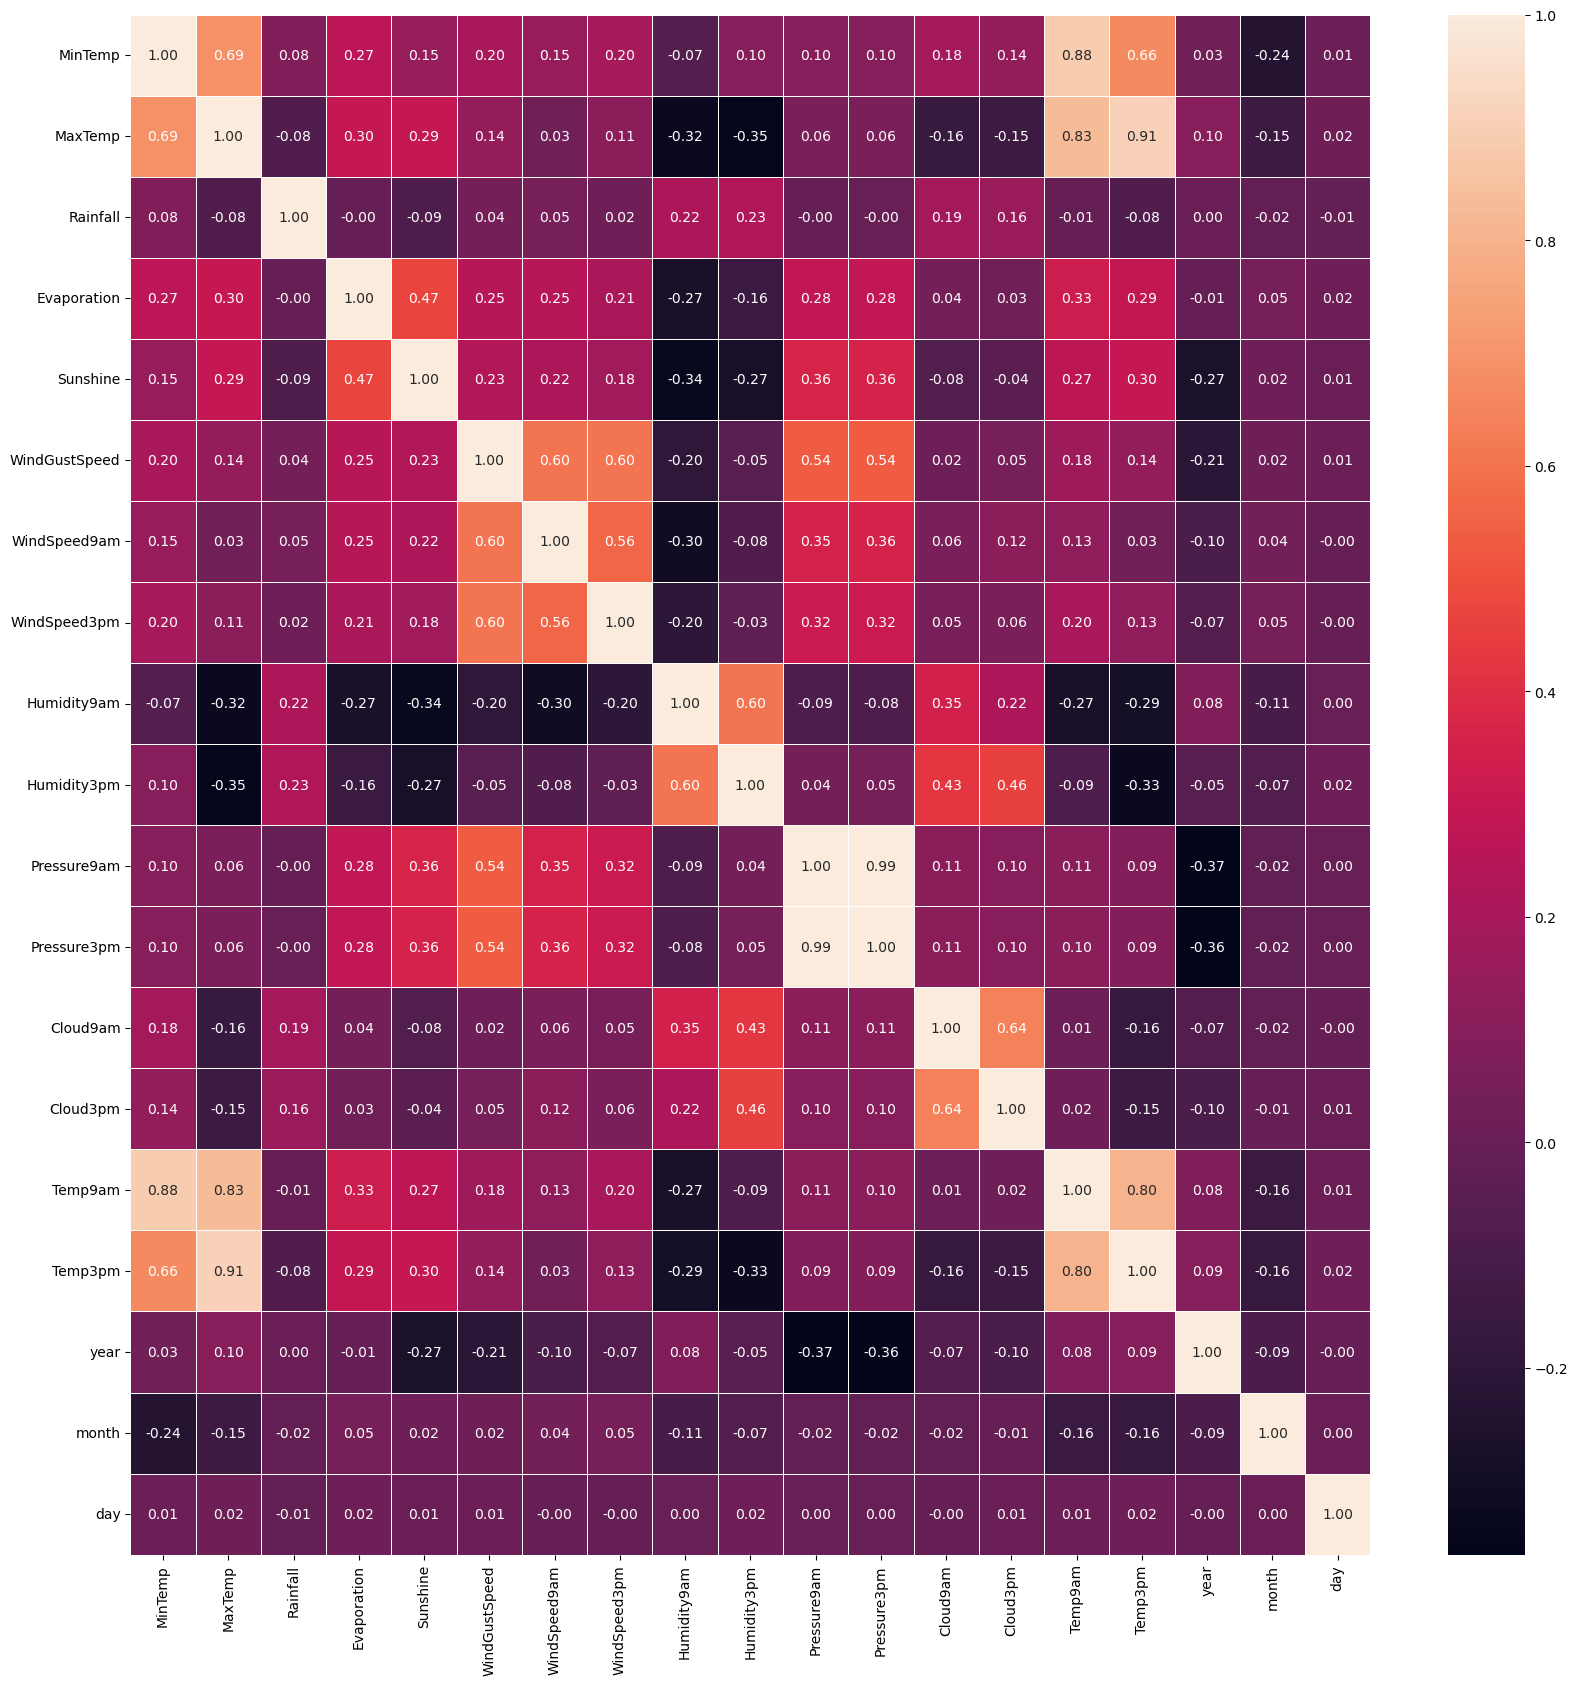

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")

# lets check for the outliers 

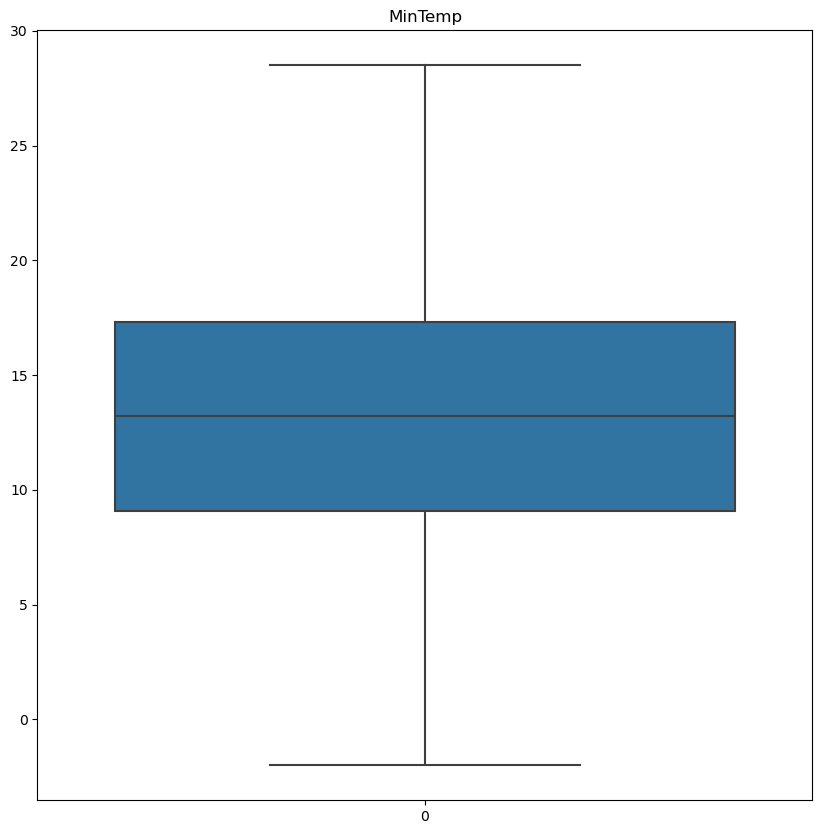

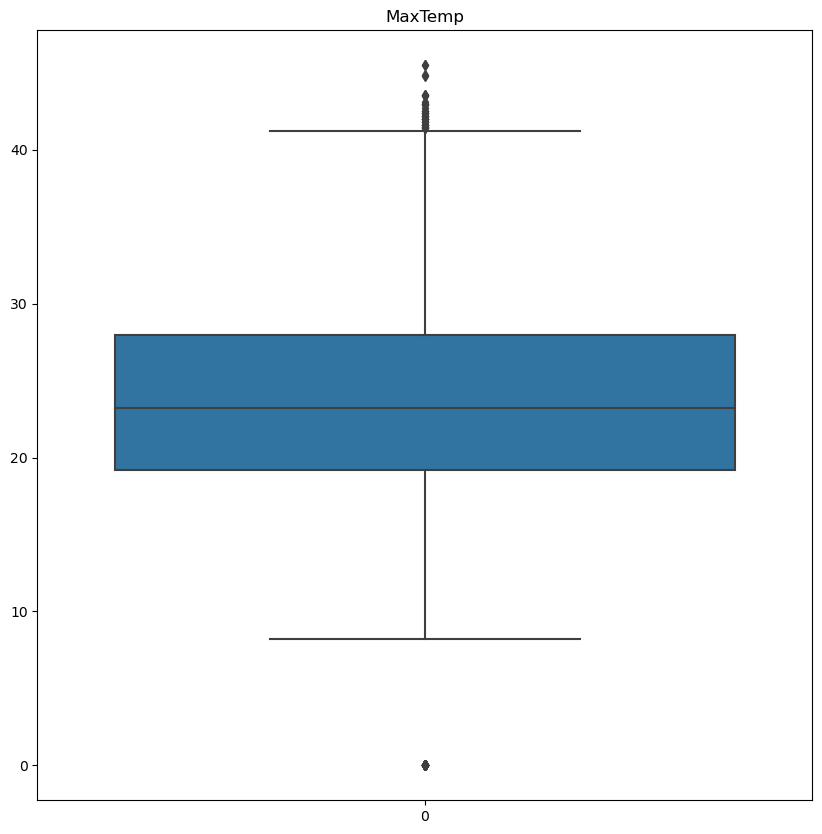

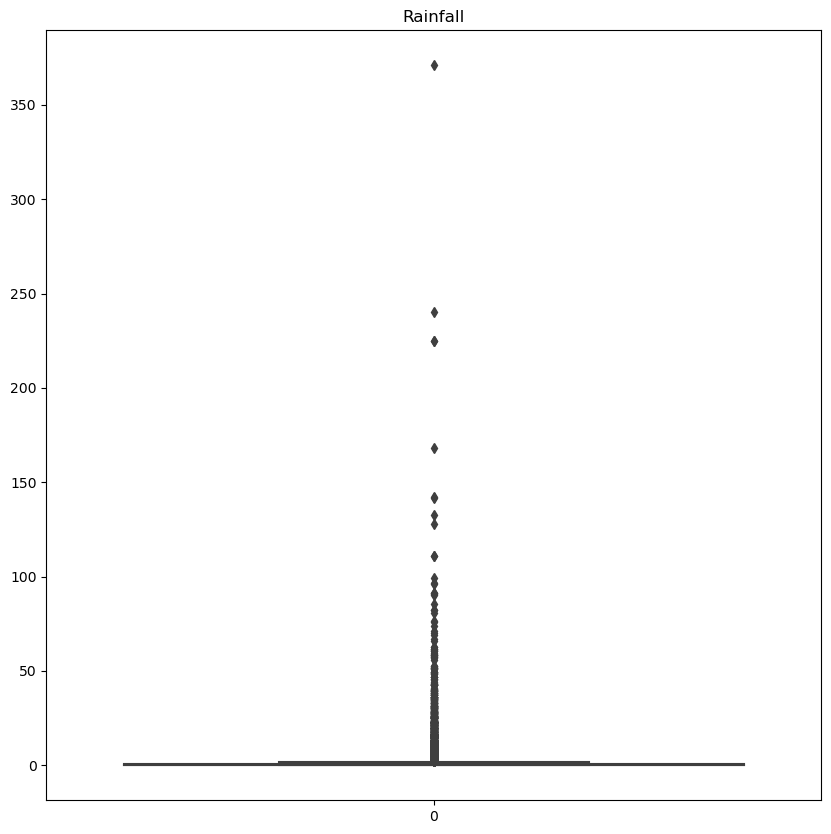

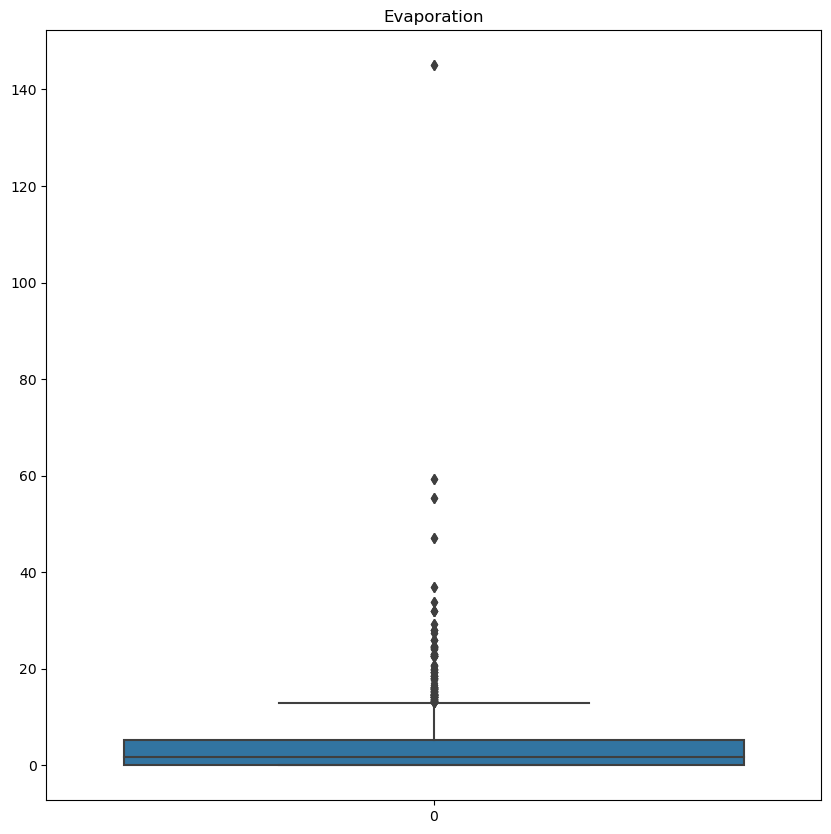

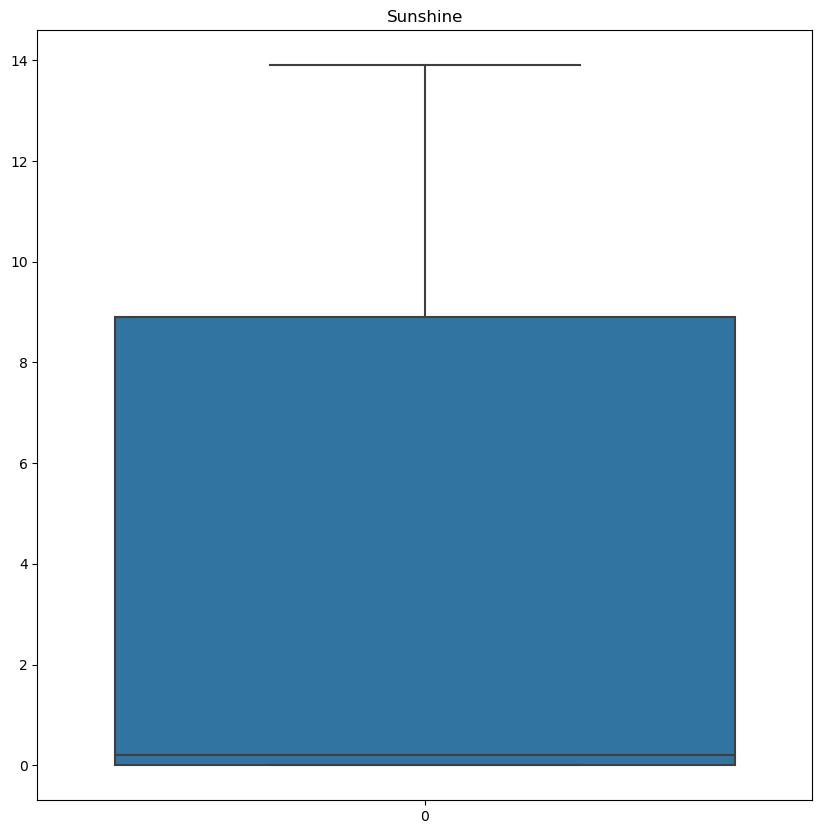

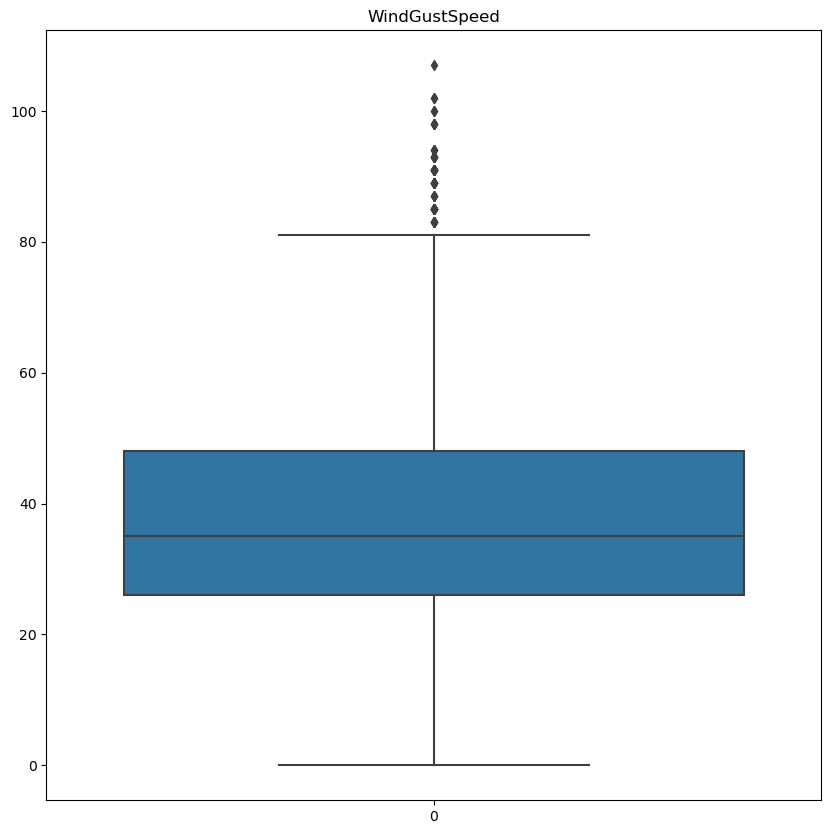

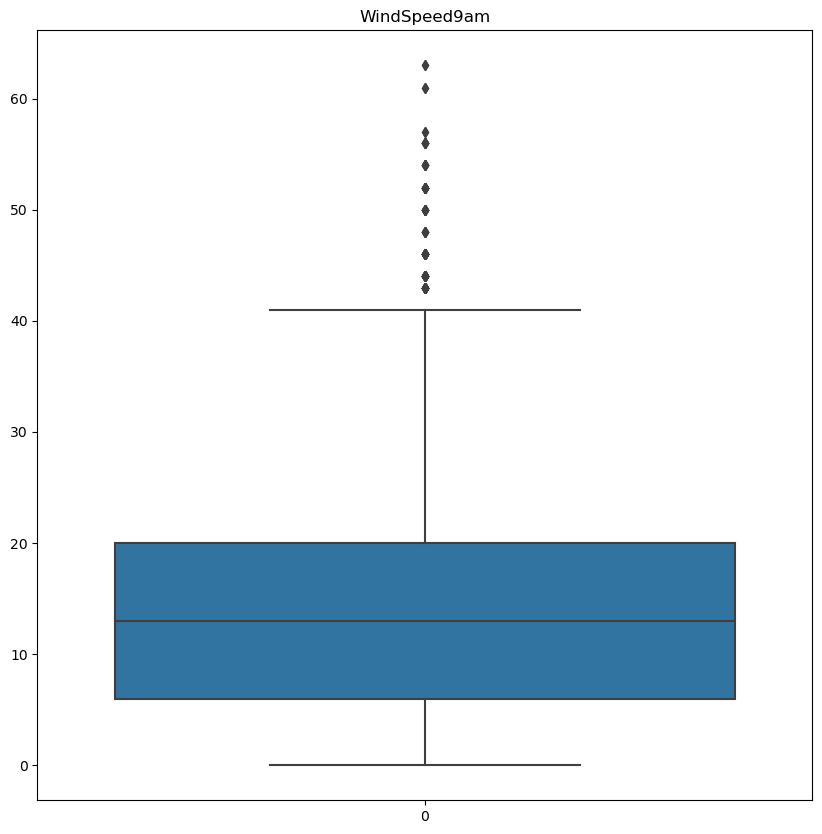

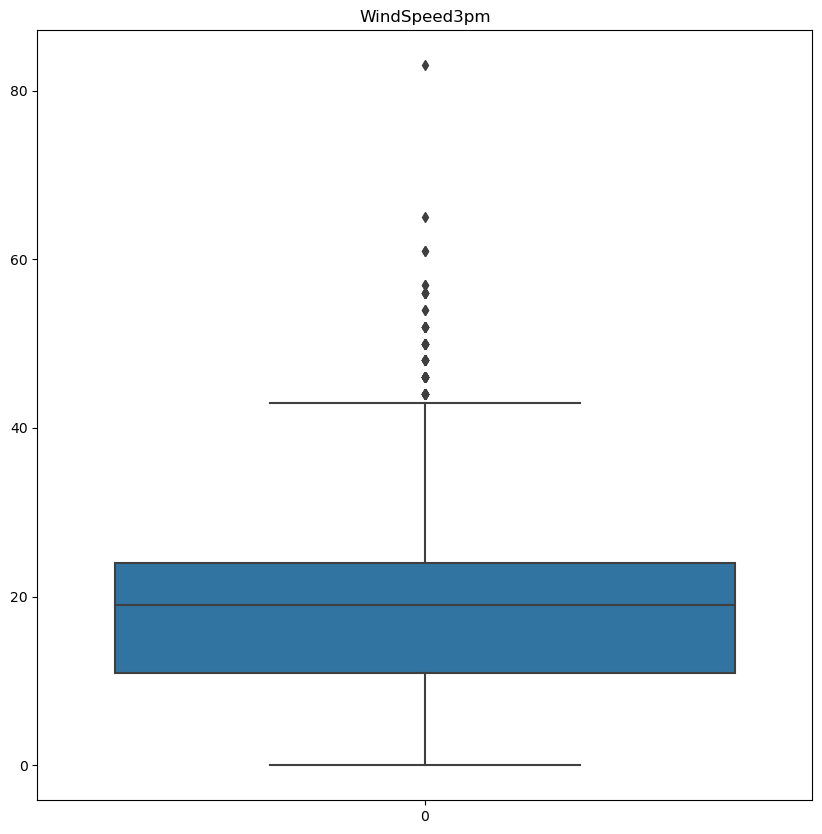

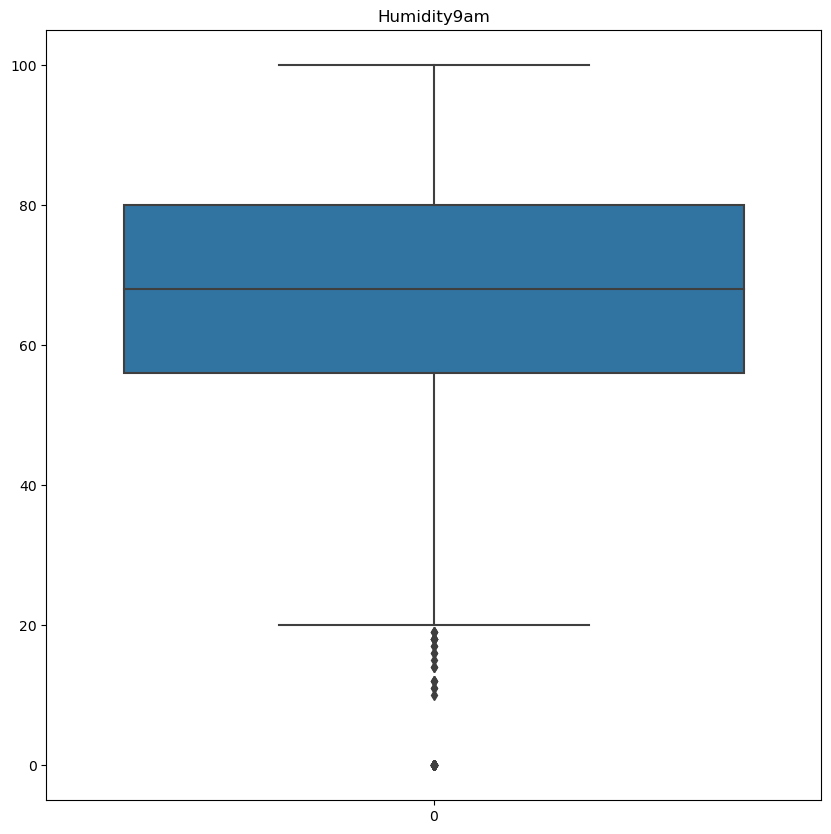

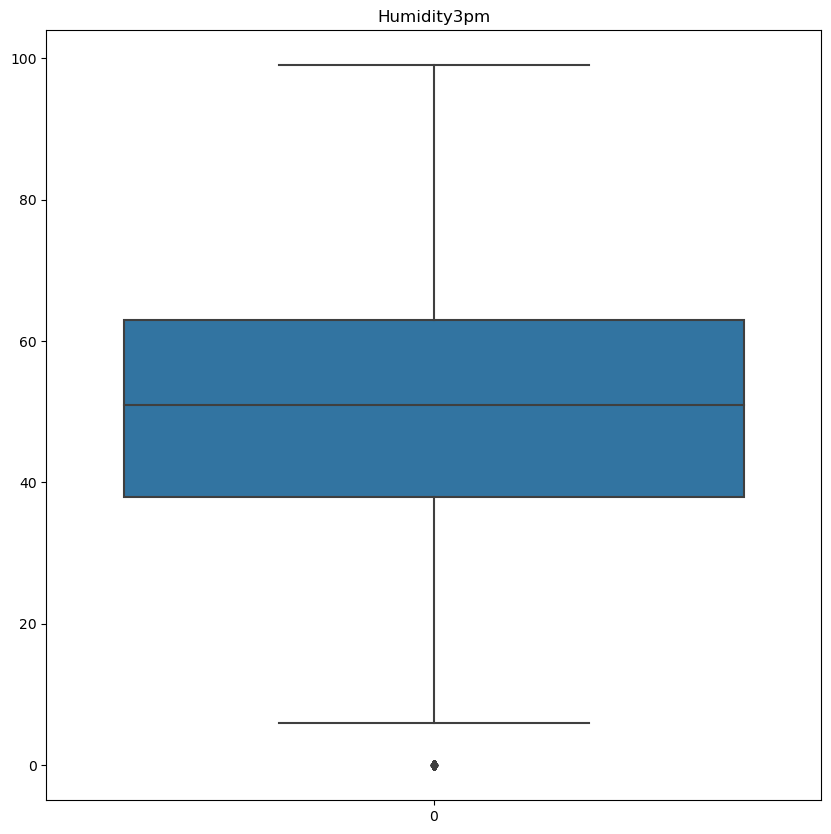

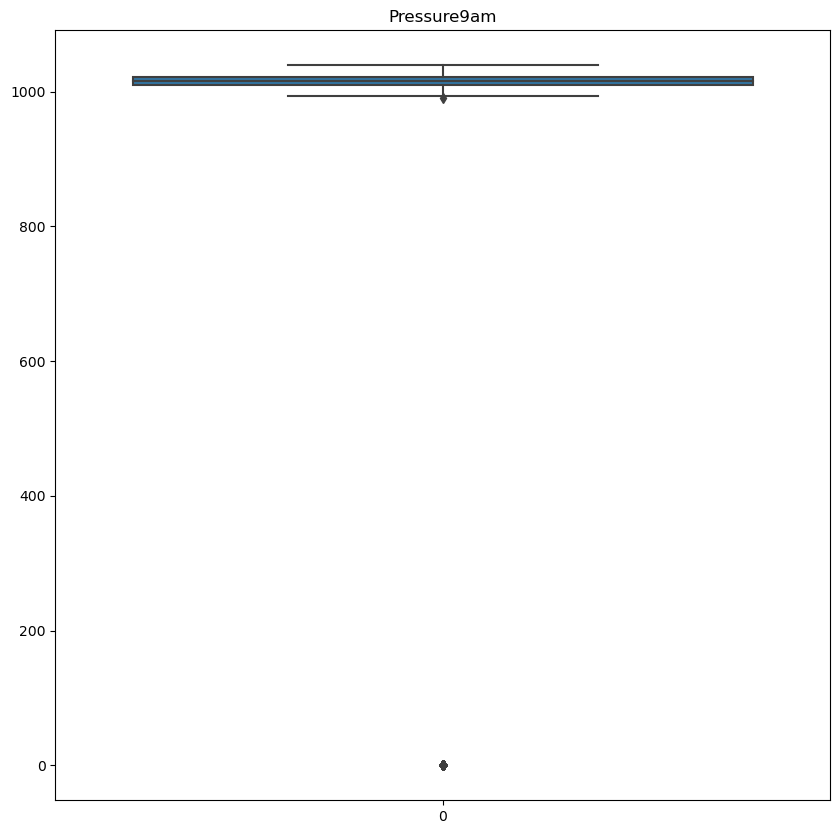

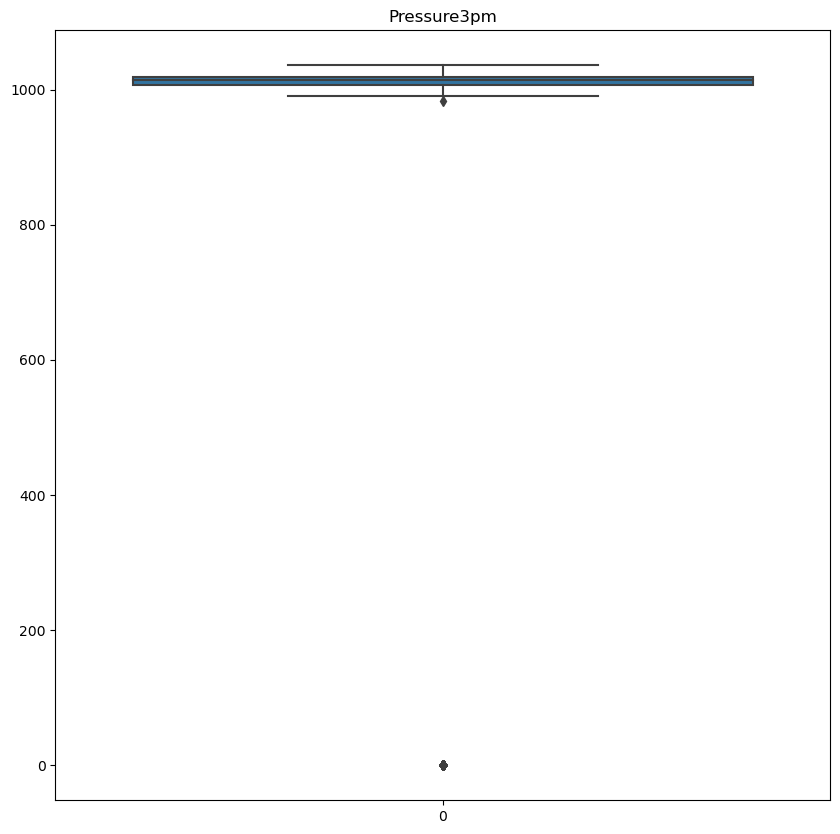

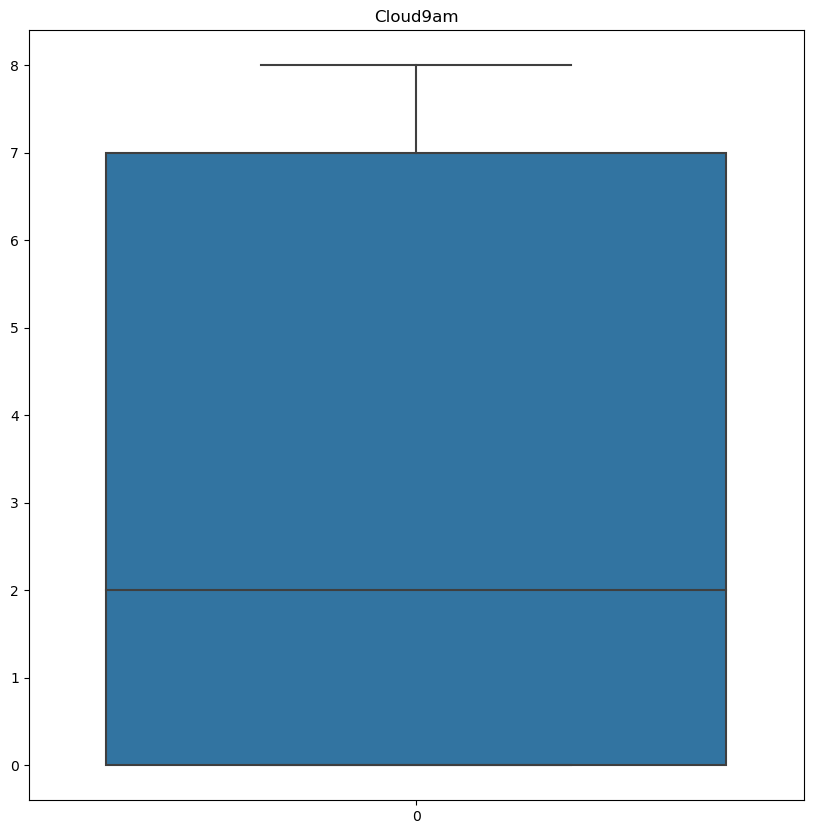

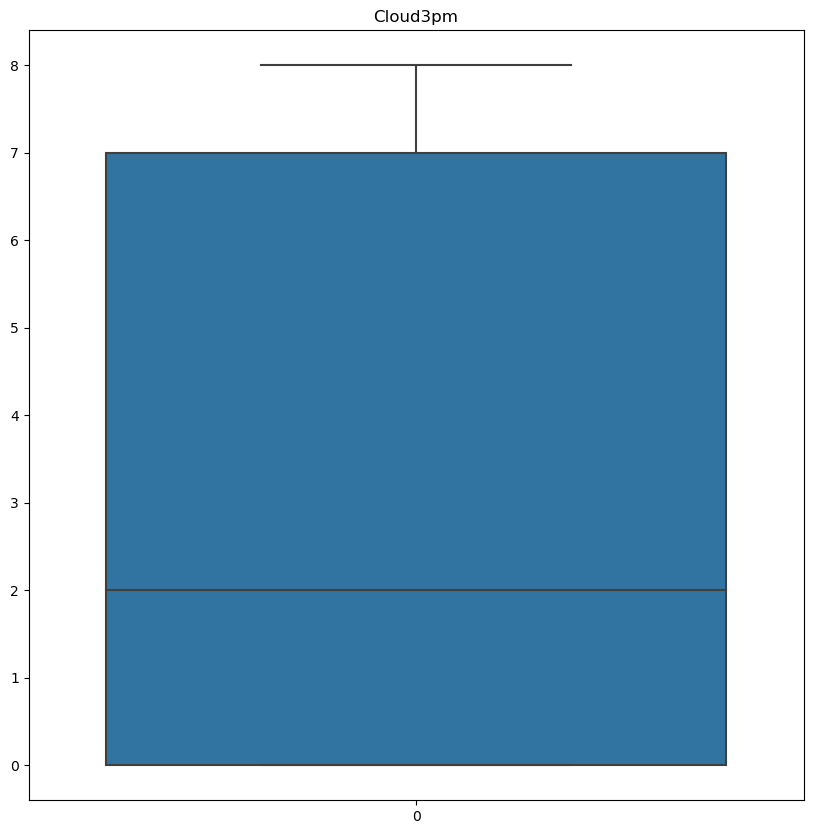

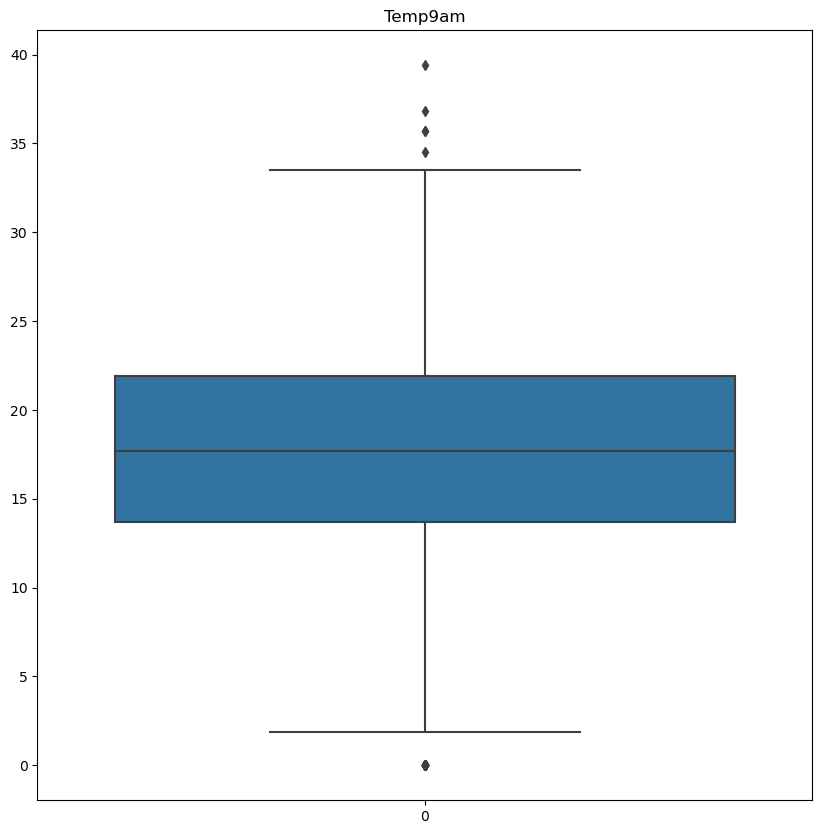

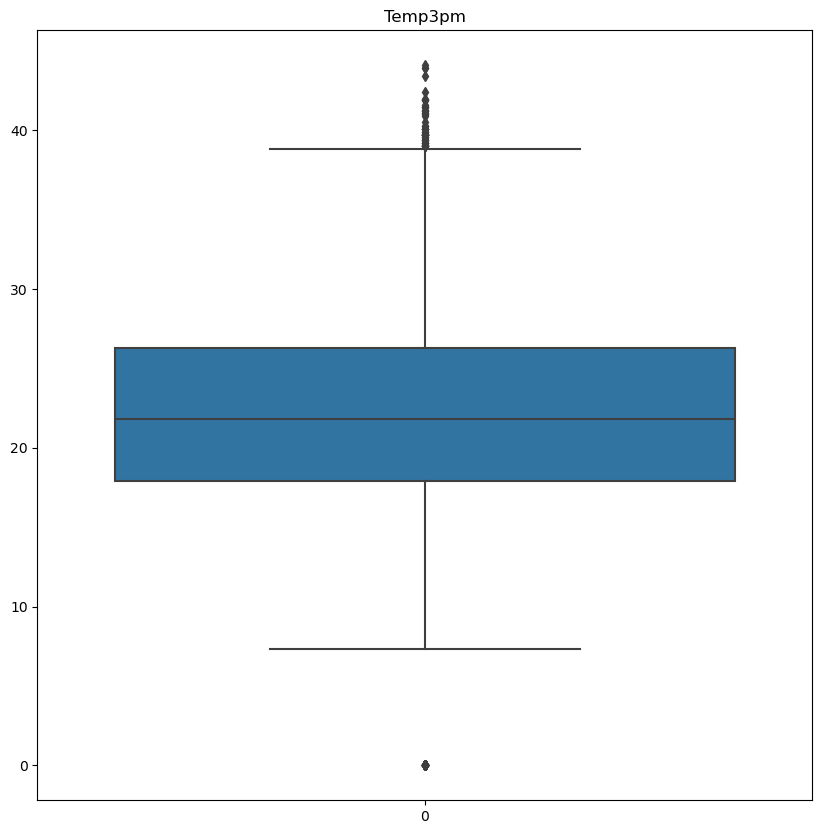

In [29]:
for feature in Numerical:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)
    

# Now we are going to encode the categorical data 

In [30]:
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)


In [31]:
def encode_data(feature_name):
    
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [32]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
df['Location'].replace(encode_data('Location'), inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 0: 8, 'ENE': 9, 'SSE': 10, 'S': 11, 'NW': 12, 'SE': 13, 'ESE': 14, 'E': 15, 'SSW': 16}
{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 0: 8, 'SSW': 9, 'N': 10, 'WSW': 11, 'ESE': 12, 'E': 13, 'NW': 14, 'WNW': 15, 'NNE': 16}
{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 0: 15, 'NE': 16}
{'Albury': 0, 'CoffsHarbour': 1, 'Newcastle': 2, 'Penrith': 3, 'Williamtown': 4, 'Wollongong': 5, 'Melbourne': 6, 'Brisbane': 7, 'Adelaide': 8, 'PerthAirport': 9, 'Darwin': 10, 'Uluru': 11}


In [33]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,0.0,0.0,0,44.0,0,0,...,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,0.0,0.0,1,44.0,1,1,...,1007.8,0.0,0.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,0.0,0.0,2,46.0,0,1,...,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,0.0,0.0,3,24.0,2,2,...,1012.8,0.0,0.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,0.0,0.0,0,41.0,3,3,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
5,0,14.6,29.7,0.2,0.0,0.0,1,56.0,0,4,...,1005.4,0.0,0.0,20.6,28.9,0,0,2008,12,6
6,0,14.3,25.0,0.0,0.0,0.0,0,50.0,4,4,...,1008.2,1.0,0.0,18.1,24.6,0,0,2008,12,7
7,0,7.7,26.7,0.0,0.0,0.0,0,35.0,5,4,...,1010.1,0.0,0.0,16.3,25.5,0,0,2008,12,8
8,0,9.7,31.9,0.0,0.0,0.0,4,80.0,2,3,...,1003.6,0.0,0.0,18.3,30.2,0,1,2008,12,9
9,0,13.1,30.1,1.4,0.0,0.0,0,28.0,6,5,...,1005.7,0.0,0.0,20.1,28.2,1,0,2008,12,10


# Outliers Removal

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (8425, 25)
Shape of the dataframe after removing outliers:  (7927, 25)
Percentage of data loss post outlier removal:  5.910979228486648


# Checking the Skewness of the data

In [35]:
df.skew()

Location        -0.033086
MinTemp         -0.095127
MaxTemp          0.333092
Rainfall         3.511642
Evaporation      1.090473
Sunshine         0.568649
WindGustDir     -0.024195
WindGustSpeed   -0.175936
WindDir9am      -0.029711
WindDir3pm      -0.040802
WindSpeed9am     0.708388
WindSpeed3pm     0.320522
Humidity9am     -0.240468
Humidity3pm      0.110589
Pressure9am     -2.026305
Pressure3pm     -2.029235
Cloud9am         0.307603
Cloud3pm         0.331955
Temp9am         -0.035970
Temp3pm          0.360572
RainToday        1.292934
RainTomorrow     1.286133
year             0.468184
month            0.048648
day              0.003786
dtype: float64

the skewness of the data is allright

# Taking the Rain Tomorrow Varable as a Target Variable

In [36]:
df.RainTomorrow.value_counts()

0    6107
1    1820
Name: RainTomorrow, dtype: int64

# Balancing the IMbalanced cell using Smote function

In [37]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
x = df.drop(['RainTomorrow'], axis =1)
y = df['RainTomorrow']

In [38]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [39]:
y.value_counts()

0    6107
1    6107
Name: RainTomorrow, dtype: int64

# Standard scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x = scaler.fit_transform(x)

# Now Building the Machine Learning Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.metrics import plot_roc_curve

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (8549, 24)
Training target vector size: (8549,)
Test feature matrix size: (3665, 24)
Test target vector size: (3665,)


# Finding the Best Random State

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7879945429740791 on Random_state 170


# Logistic Regression

In [44]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7722540648029009


Classification ML Algorithm Evaluation Matrix for Logistic Regression is


Accuracy Score : 0.7697135061391541


Confusion matrix :
 [[1419  409]
 [ 435 1402]]


Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1828
           1       0.77      0.76      0.77      1837

    accuracy                           0.77      3665
   macro avg       0.77      0.77      0.77      3665
weighted avg       0.77      0.77      0.77      3665





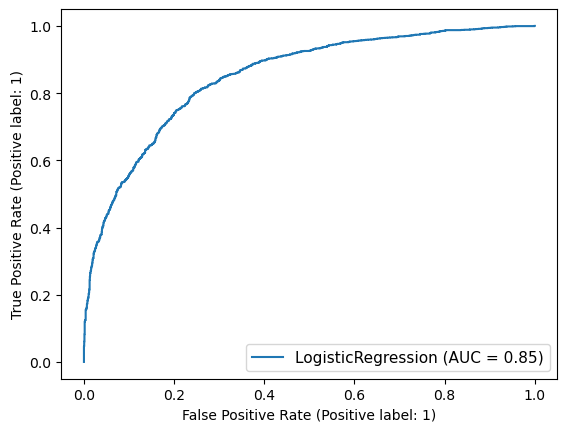

In [45]:
print('Classification ML Algorithm Evaluation Matrix for Logistic Regression is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(LR,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# SVC MODEL

Classification ML Algorithm Evaluation Matrix SVC Model is


Accuracy Score : 0.8646657571623465


Confusion matrix :
 [[1552  276]
 [ 220 1617]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1828
           1       0.85      0.88      0.87      1837

    accuracy                           0.86      3665
   macro avg       0.87      0.86      0.86      3665
weighted avg       0.86      0.86      0.86      3665





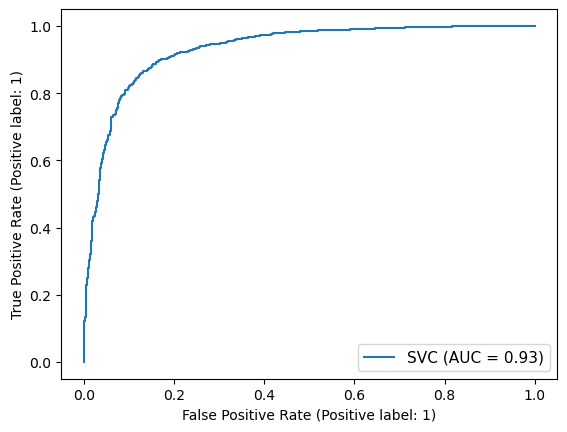

In [46]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix SVC Model is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(svc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()


# GAUSIAN NB MODEL

Classification ML Algorithm Evaluation Matrix for GaussianNB is


Accuracy Score : 0.7296043656207367


Confusion matrix :
 [[1360  468]
 [ 523 1314]]


Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1828
           1       0.74      0.72      0.73      1837

    accuracy                           0.73      3665
   macro avg       0.73      0.73      0.73      3665
weighted avg       0.73      0.73      0.73      3665





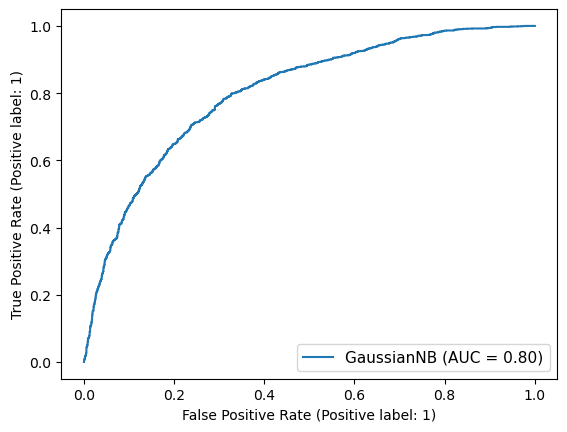

In [47]:
GNB =GaussianNB()
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for GaussianNB is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(GNB,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# DECISION TREE CLASSIFIER MODEL

Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is


Accuracy Score : 0.8649386084583902


Confusion matrix :
 [[1552  276]
 [ 219 1618]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1828
           1       0.85      0.88      0.87      1837

    accuracy                           0.86      3665
   macro avg       0.87      0.86      0.86      3665
weighted avg       0.87      0.86      0.86      3665





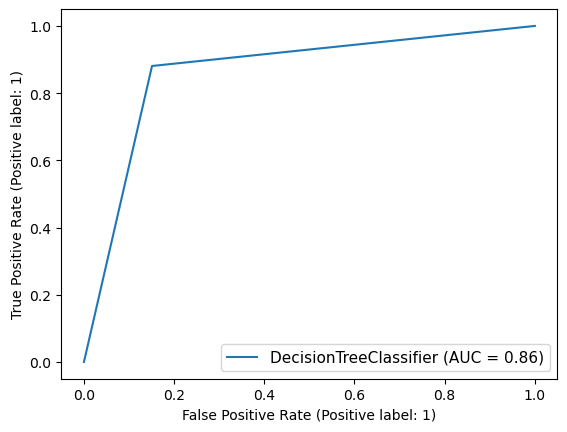

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(dtc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# KNC MODEL

Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is


Accuracy Score : 0.8731241473396999


Confusion matrix :
 [[1432  396]
 [  69 1768]]


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      1828
           1       0.82      0.96      0.88      1837

    accuracy                           0.87      3665
   macro avg       0.89      0.87      0.87      3665
weighted avg       0.89      0.87      0.87      3665





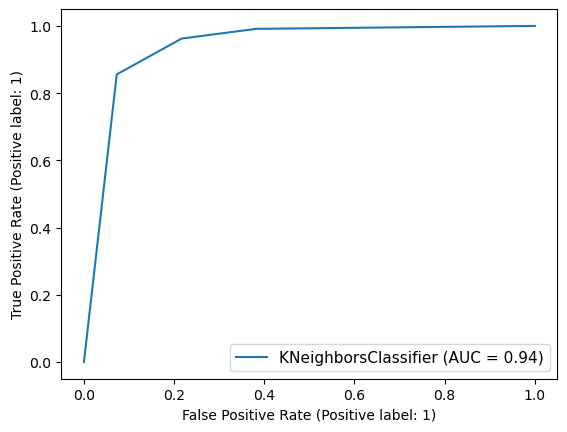

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(knn,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# RANDOM FOREST CLASSIFIER MODEL

Classification ML Algorithm Evaluation Matrix RandomForestClassifier is


Accuracy Score : 0.9304229195088677


Confusion matrix :
 [[1699  129]
 [ 126 1711]]


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1828
           1       0.93      0.93      0.93      1837

    accuracy                           0.93      3665
   macro avg       0.93      0.93      0.93      3665
weighted avg       0.93      0.93      0.93      3665





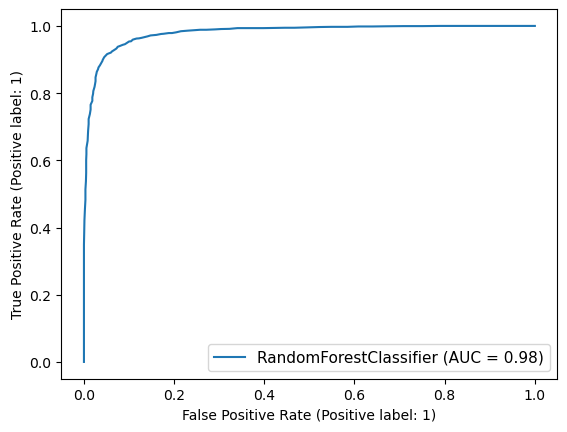

In [50]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix RandomForestClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(rfc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# EXTRA TREES CLASSIFIER

Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is


Accuracy Score : 0.9413369713506139


Confusion matrix :
 [[1704  124]
 [  91 1746]]


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1828
           1       0.93      0.95      0.94      1837

    accuracy                           0.94      3665
   macro avg       0.94      0.94      0.94      3665
weighted avg       0.94      0.94      0.94      3665





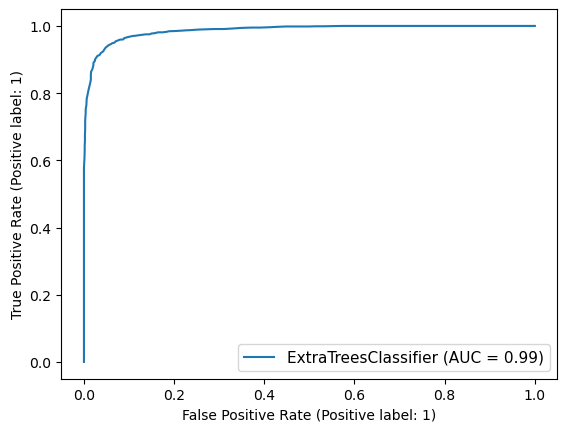

In [51]:
ETC =  ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(ETC,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Checking the Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models =[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]


names = ['LR','svc','GNB','dtc','knn','rfc','ETC']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.2f}, {:1f}".format(name,score.mean(),score.std()))


LR    : 0.34, 0.108516
svc    : 0.33, 0.109046
GNB    : 0.36, 0.123440
dtc    : 0.34, 0.165670
knn    : 0.28, 0.088548
rfc    : 0.31, 0.191160
ETC    : 0.27, 0.160697


# Hyper Parameter Tuning Using Grid Search CV 

In [53]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [54]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.790 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.784 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.795 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.765 total time=   0.0s
[CV 5

[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.789 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.806 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.806 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.778 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_dept

[CV 1/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.867 total time=   0.1s
[CV 2/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.864 total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.852 total time=   0.1s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criteri

[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.868 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.847 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.871 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 24/168] END bootstrap=True, criteri

[CV 3/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.902 total time=   0.0s
[CV 4/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 4/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.884 total time=   0.1s
[CV 5/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.898 total time=   0.1s
[CV 1/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.908 total time=   0.2s
[CV 2/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 2/5; 31/168] END bootstrap=True, criteri

[CV 3/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.904 total time=   0.1s
[CV 4/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.884 total time=   0.1s
[CV 5/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 1/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.895 total time=   0.2s
[CV 2/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 38/168] END bootstrap=True, criteri

[CV 4/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.885 total time=   0.1s
[CV 5/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.891 total time=   0.1s
[CV 1/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.902 total time=   0.2s
[CV 2/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.908 total time=   0.2s
[CV 3/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 3/5; 45/168] END bootstrap=True, criteri

[CV 4/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.894 total time=   0.1s
[CV 5/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.907 total time=   0.1s
[CV 1/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.902 total time=   0.2s
[CV 2/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.911 total time=   0.2s
[CV 3/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 3/5; 52/168] END bootstrap=True, criteri

[CV 5/5; 58/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10;, score=0.894 total time=   0.1s
[CV 1/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 1/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.906 total time=   0.2s
[CV 2/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 2/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.902 total time=   0.1s
[CV 3/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 3/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.907 total time=   0.1s
[CV 4/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 4/5; 59/168] END bootstrap=True, criteri

[CV 5/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.894 total time=   0.1s
[CV 1/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.904 total time=   0.2s
[CV 2/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.913 total time=   0.2s
[CV 3/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 3/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.913 total time=   0.2s
[CV 4/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 4/5; 66/168] END bootstrap=True, criteri

[CV 5/5; 72/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=10;, score=0.896 total time=   0.1s
[CV 1/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 1/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.905 total time=   0.2s
[CV 2/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 2/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.910 total time=   0.2s
[CV 3/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 3/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.908 total time=   0.1s
[CV 4/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 4/5; 73/168] END bootstrap=True, criteri

[CV 5/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 1/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.909 total time=   0.1s
[CV 2/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.915 total time=   0.2s
[CV 3/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 3/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.911 total time=   0.2s
[CV 4/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 4/5; 80/168] END bootstrap=True, criteri

[CV 5/5; 86/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.796 total time=   0.0s
[CV 1/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 1/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.798 total time=   0.0s
[CV 2/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 2/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.796 total time=   0.0s
[CV 3/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 3/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.805 total time=   0.1s
[CV 4/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 4/5; 87/168] END bootstr

[CV 1/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.785 total time=   0.0s
[CV 2/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.795 total time=   0.0s
[CV 3/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.804 total time=   0.1s
[CV 4/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 4/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.778 total time=   0.0s
[CV 5/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 5/5; 94/168] END bootstr

[CV 5/5; 100/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=10;, score=0.861 total time=   0.1s
[CV 1/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 1/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.865 total time=   0.1s
[CV 2/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 2/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.874 total time=   0.1s
[CV 3/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 3/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.884 total time=   0.1s
[CV 4/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 101

[CV 5/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 1/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.869 total time=   0.1s
[CV 2/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 2/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.873 total time=   0.1s
[CV 3/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 3/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.887 total time=   0.1s
[CV 4/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 4/5; 108

[CV 5/5; 114/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=0.894 total time=   0.1s
[CV 1/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.905 total time=   0.2s
[CV 2/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 2/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.914 total time=   0.2s
[CV 3/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 3/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.911 total time=   0.1s
[CV 4/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 4/5; 115

[CV 4/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.895 total time=   0.1s
[CV 5/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.896 total time=   0.1s
[CV 1/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.904 total time=   0.2s
[CV 2/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.919 total time=   0.2s
[CV 3/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 3/5; 122

[CV 3/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.902 total time=   0.1s
[CV 4/5; 128/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10
[CV 4/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.888 total time=   0.1s
[CV 5/5; 128/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.905 total time=   0.1s
[CV 1/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 129/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15;, score=0.912 total time=   0.2s
[CV 2/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 129

[CV 2/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.902 total time=   0.1s
[CV 3/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 3/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.896 total time=   0.1s
[CV 4/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 4/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.892 total time=   0.1s
[CV 5/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.895 total time=   0.1s
[CV 1/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 136

[CV 1/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.891 total time=   0.1s
[CV 2/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 2/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.899 total time=   0.1s
[CV 3/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 3/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.903 total time=   0.1s
[CV 4/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 4/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.885 total time=   0.1s
[CV 5/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 5/5; 142

[CV 1/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.897 total time=   0.1s
[CV 2/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 2/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.899 total time=   0.1s
[CV 3/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.908 total time=   0.1s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.890 total time=   0.1s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149

[CV 1/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.905 total time=   0.1s
[CV 2/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 2/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.908 total time=   0.1s
[CV 3/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 3/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.894 total time=   0.1s
[CV 4/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 4/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.889 total time=   0.1s
[CV 5/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 5/5; 156

[CV 1/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.896 total time=   0.1s
[CV 2/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 2/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.898 total time=   0.1s
[CV 3/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.885 total time=   0.1s
[CV 5/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 163

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [55]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 70}

# Final Model

In [56]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=20 ,max_features='auto')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.9323328785811733


# Now Taking the the Rainfall as a Target Variable 

In [57]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']

In [58]:
x.shape

(7927, 24)

In [59]:
y.shape

(7927,)

In [60]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [62]:
 LR=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.495715409019031
At random state 0, The test accuracy is: 0.49642601501771755


At random state 1, The training accuracy is: 0.4959599459232099
At random state 1, The test accuracy is: 0.4944430778968405


At random state 2, The training accuracy is: 0.4947393853242392
At random state 2, The test accuracy is: 0.4977846744661685


At random state 3, The training accuracy is: 0.495204912092332
At random state 3, The test accuracy is: 0.49845666256801846


At random state 4, The training accuracy is: 0.4973312342311017
At random state 4, The test accuracy is: 0.4903613916349536


At random state 5, The training accuracy is: 0.4989274810861124
At random state 5, The test accuracy is: 0.48009157898690047


At random state 6, The training accuracy is: 0.4966987972811412
At random state 6, The test accuracy is: 0.49276460793900956


At random state 7, The training accuracy is: 0.5017444025124754
At random state 7, The test accuracy is: 0.473536576

At random state 65, The training accuracy is: 0.5017499226439174
At random state 65, The test accuracy is: 0.47375829041619466


At random state 66, The training accuracy is: 0.4956945686854244
At random state 66, The test accuracy is: 0.4934276967386123


At random state 67, The training accuracy is: 0.49718240785845125
At random state 67, The test accuracy is: 0.490661076711175


At random state 68, The training accuracy is: 0.49059638465571176
At random state 68, The test accuracy is: 0.5175847760447769


At random state 69, The training accuracy is: 0.4943704435125771
At random state 69, The test accuracy is: 0.5023194463104881


At random state 70, The training accuracy is: 0.5013529396723712
At random state 70, The test accuracy is: 0.4756526466862835


At random state 71, The training accuracy is: 0.5004175797634052
At random state 71, The test accuracy is: 0.48013326415338853


At random state 72, The training accuracy is: 0.49532591682350924
At random state 72, The test accura

At random state 135, The training accuracy is: 0.4906651541716688
At random state 135, The test accuracy is: 0.5109334791119093


At random state 136, The training accuracy is: 0.5006430722152377
At random state 136, The test accuracy is: 0.4786896167362982


At random state 137, The training accuracy is: 0.49400435465817627
At random state 137, The test accuracy is: 0.5042030195224573


At random state 138, The training accuracy is: 0.49252381141873136
At random state 138, The test accuracy is: 0.5104445002621418


At random state 139, The training accuracy is: 0.4978821664467744
At random state 139, The test accuracy is: 0.48842585200234656


At random state 140, The training accuracy is: 0.49740387700914224
At random state 140, The test accuracy is: 0.4881661243588624


At random state 141, The training accuracy is: 0.4884113802127773
At random state 141, The test accuracy is: 0.5160567156995486


At random state 142, The training accuracy is: 0.4978291578679592
At random state 142,

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=193)

# LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.500168486119863


In [65]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 11.307299929968474
MAE: 1.5433712488481095
r2_score: -0.029150305304388224


# Ridge

In [66]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5001272095697488


In [67]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 11.269111457589952
MAE: 1.538456256473892
r2_score: -0.026350436400392807


# SVR

In [68]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)


0.41480360780974357


In [69]:

print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 12.776974151555988
MAE: 1.2532665137708683
r2_score: -1.7584432060662225


# RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)


0.9511264042779026


In [71]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 8.215099730966838
MAE: 1.0241644091546005
r2_score: 0.42039980773510066


# DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [73]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 15.392671648762256
MAE: 1.1129845866417563
r2_score: 0.34637141608246447


# GradientBoostingRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.6593535053065821


In [75]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 10.041863975528189
MAE: 1.2830228396418593
r2_score: 0.12315375829853281


# Cross Validation Score

In [76]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 11.600492, 1.788275
R    : 11.579440, 1.796262
svr    : 13.410088, 2.487982
RF    : 7.400827, 4.258761
DTR    : 12.761753, 9.244775
GBR    : 10.278352, 1.876186


# Grid Search CV

In [77]:
from sklearn.model_selection import GridSearchCV
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }


In [78]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [79]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [80]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}